# Gaussian probability regression (GPR)

In [219]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

filename = "ML_noerror.csv"
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')
[Row,Column] = data.shape
fts = data[0:10000,1:6]
soh = data[0:10000,0:1]
soh2 = [];
for i in range(len(soh)):
    soh2.append(soh[i][0].astype(np.float64))
pred_soh = np.array(soh2)
features_train, features_test, pred_soh_train, pred_soh_test = train_test_split(fts, pred_soh.ravel(), test_size=0.2, random_state=100)


In [220]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(features_train, pred_soh_train)
train = np.round(gpr.score(features_train, pred_soh_train),3)
test = np.round(gpr.score(features_test, pred_soh_test),3)
#MAE = np.round(gpr.mean_absolute_error(predictions,pred_soh_test),3)
#RMSE = np.round(np.sqrt(gpr.mean_squared_error(predictions,pred_soh_test)),3)
print("R_sq of train = ", train)
print("R_sq of  test = ", test)
#print(" MAE = ", MAE)
#print("RMSE = ", RMSE)

R_sq of train =  0.925
R_sq of  test =  0.917


In [212]:
prediction = gpr.predict(features_test)     # , return_std=True
R_sq = np.round(gpr.score(pred_soh_test, prediction),3)
MAE = np.round(mean_absolute_error(predictions,pred_soh_test),3)
RMSE = np.round(np.sqrt(mean_squared_error(predictions,pred_soh_test)),3)

ValueError: Expected 2D array, got 1D array instead:
array=[ 94.3  96.2  53.8  64.7  68.3  94.8  30.8  68.8  38.1  92.8  63.2  97.6
  79.7 100.   91.   47.8  59.5  45.4  59.1  42.6  70.   97.   60.5  93.6
  91.8  95.   72.3  98.7  67.6  97.9  81.   77.1  80.7  37.3  25.7  80.5
  72.9  78.4  30.   84.9  69.1  88.   91.5  73.3 100.   86.5  72.3  73.9
  58.3  61.6  31.5  71.6  95.2  86.6  84.   89.7  88.   51.2  81.6  94.4
 100.   68.9  89.9  76.9  48.7  70.9  43.5  73.3  71.1  83.1  67.   69.5
  83.1  73.5 100.   99.7  45.5  33.9  83.1  56.6  69.1  91.8  93.  100.
  36.   57.2  70.9  64.7  93.4  89.2  97.   78.9  79.7  81.9  95.8  67.5
  72.6  64.2  66.9  52.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Regression family algorithm

In [141]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

filename = "ML_noerror.csv"
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(data[:,1:6], 
                                                                data[:,0:1], 
                                                                test_size= 0.1)
            r2_test.append(metrics.r2_score(y_test, models[i].fit(X_train, y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, models[i].fit(X_train, y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [142]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models, data)

,OLS,Lasso,Ridge
0,0.945970,0.876724,0.944685
1,0.945208,0.876348,0.944814


In [143]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(data[:,1:6], data[:,0:1]).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(data[:,1:6], data[:,0:1]).best_estimator_,}
test(models2, data)

,OLS,Lasso,Ridge
0,0.945956,0.935499,0.919348
1,0.945297,0.935446,0.919647


In [144]:
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'alpha':[550, 580, 600, 620, 650]}

models3 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(data[:,1:6], data[:,0:1]).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(data[:,1:6], data[:,0:1]).best_estimator_,}
test(models3, data)

,OLS,Lasso,Ridge
0,0.945944,0.944866,0.905147
1,0.945413,0.944602,0.906602


# Bayesian Ridge algorithm_單一改參數

In [226]:
'''1123 嘗試調參 失敗'''
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn import linear_model     # BayesianRidge
import pylab as plot

In [227]:
# Loading dataset
filename = "ML_noerror.csv"
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')
[Row,Column] = data.shape
fts = data[:,1:6]
soh = data[:,0:1]
soh2 = [];
for i in range(len(soh)):
    soh2.append(soh[i][0].astype(np.float64))
pred_soh = np.array(soh2)
features_train, features_test, pred_soh_train, pred_soh_test = train_test_split(fts, pred_soh.ravel(), test_size=0.2, random_state=100)


In [252]:
params_Baye = {"n_iter":700 , "tol":0.01, "alpha_1":1e-04, "alpha_2":1e-06, "lambda_1":1e-06, "lambda_2":1e-06}   # ,"n_iter":100 , "tol":0.01, "alpha_2":1e-06, "lambda_1":1e-06, "lambda_2":1e-06
model = linear_model.BayesianRidge(tol=0.0001, fit_intercept=True, compute_score=True)   # 
model.set_params(**params_Baye)
model.fit(features_train, pred_soh_train)
prediction = model.predict(features_test)
RMSE = np.round(math.sqrt(mean_squared_error(pred_soh_test, prediction)),3)
MAE = np.round(mean_absolute_error(pred_soh_test, prediction),3)
R_sq = np.round(r2_score(pred_soh_test, prediction),3)

RMSE =  4.091
 MAE =  3.0


Text(0, 0.5, 'RMSE(%)')

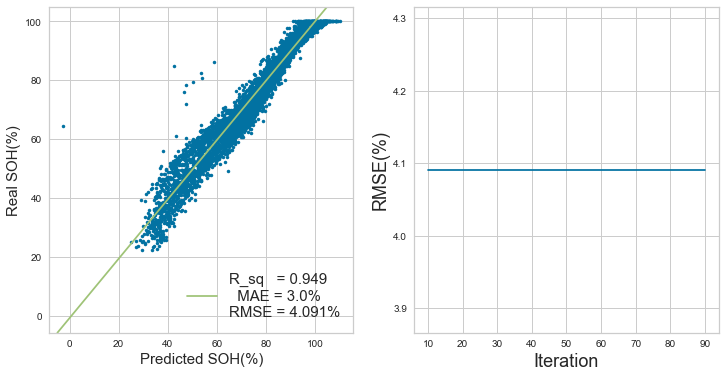

In [253]:
# Plotting the result
print("RMSE = ",RMSE); print(" MAE = ",MAE);

f = plot.figure(figsize=(12,6))
ax1 = f.add_subplot(121); ax2 = f.add_subplot(122)

ax1.plot(prediction,pred_soh_test, 'b.')
m1, b1 = np.polyfit(prediction,pred_soh_test, 1);
ax1.axline(xy1=(0, b1), slope=m1, color='g', label=f'R_sq   = {R_sq}\n  MAE = {MAE}%\nRMSE = {RMSE}%') # 
ax1.set_xlabel("Predicted SOH(%)", fontsize=15) 
ax1.set_ylabel("Real SOH(%)", fontsize=15)
ax1.legend(fontsize=15)

ax2.plot(variable, rmseoos)
ax2.set_xlabel("Iteration", fontsize=18) 
ax2.set_ylabel("RMSE(%)", fontsize=18)


# Bayesian Ridge algorithm_迴圈調參數

In [1]:
'''1122 Naive Bayesian algorithm'''
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.linear_model import BayesianRidge
import pylab as plot

# Loading dataset
filename = "ML_noerror.csv"
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')
[Row,Column] = data.shape
fts = data[:,1:6]
soh = data[:,0:1]
soh2 = [];
for i in range(len(soh)):
    soh2.append(soh[i][0].astype(np.float64))
pred_soh = np.array(soh2)
features_train, features_test, pred_soh_train, pred_soh_test = train_test_split(fts, pred_soh.ravel(), test_size=0.2, random_state=100)
print(pred_soh)     # 驗證是否當機


[100.  100.  100.  ...  68.2  83.1  92.1]


In [2]:
import time
t1 = time.monotonic()

rmseoos = []
variable = range(10,100,10)
for variab in variable:
    model = BayesianRidge(n_iter=variab)   # , tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06
    model.fit(features_train, pred_soh_train)
    prediction = model.predict(features_test)
    RMSE = np.round(math.sqrt(mean_squared_error(pred_soh_test, prediction)),3)
    rmseoos.append(RMSE)
MAE = np.round(mean_absolute_error(pred_soh_test, prediction),3)
R_sq = np.round(r2_score(pred_soh_test, prediction),3)

t2 = time.monotonic()
print("time elapsed:" + str(t2-t1) + " seconds")

time elapsed:0.9369999999180436 seconds


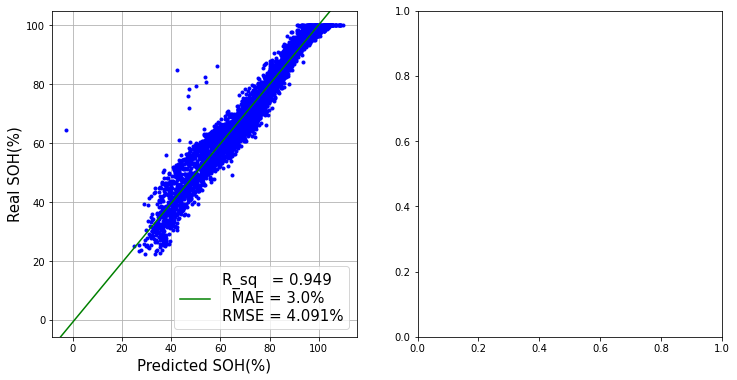

In [4]:
# Plotting the result
f = plot.figure(figsize=(12,6))
ax1 = f.add_subplot(121); ax2 = f.add_subplot(122)

ax1.plot(prediction,pred_soh_test, 'b.')
m1, b1 = np.polyfit(prediction,pred_soh_test, 1);
ax1.axline(xy1=(0, b1), slope=m1, color='g', label=f'R_sq   = {R_sq}\n  MAE = {MAE}%\nRMSE = {rmseoos[-1]}%') # 
ax1.set_xlabel("Predicted SOH(%)", fontsize=15) 
ax1.set_ylabel("Real SOH(%)", fontsize=15)
ax1.grid()
ax1.legend(fontsize=15)

#ax2.plot(variable, rmseoos)
#ax2.set_xlabel("Iteration", fontsize=18) 
#ax2.set_ylabel("RMSE(%)", fontsize=18)

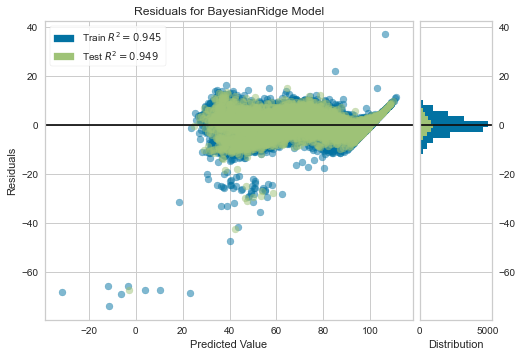

<AxesSubplot:title={'center':'Residuals for BayesianRidge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [233]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model.fit(features_train, pred_soh_train),train_alpha=0.5, test_alpha=0.5)
visualizer.fit(features_train, pred_soh_train)
visualizer.score(features_test, pred_soh_test)
visualizer.poof()

# Bayesian Ridge algorithm_網格搜尋

In [237]:
'''1128 Naive Bayesian algorithm'''
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
import pylab as plot

# Loading dataset
filename = "ML_noerror.csv"
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')
[Row,Column] = data.shape
fts = data[:,1:6]
soh = data[:,0:1]
soh2 = [];
for i in range(len(soh)):
    soh2.append(soh[i][0].astype(np.float64))
pred_soh = np.array(soh2)
features_train, features_test, pred_soh_train, pred_soh_test = train_test_split(fts, pred_soh.ravel(), test_size=0.2, random_state=100)
print(pred_soh)     # 驗證是否當機

[100.  100.  100.  ...  68.2  83.1  92.1]


In [244]:
model_byr = BayesianRidge()
search_grid={'n_iter':[300,700,1000],'tol':[0.001,0.0001,0.00001],'alpha_1':[1e-04,1e-05,1e-06],'alpha_2':[1e-04,1e-05,1e-06]}
search=GridSearchCV(estimator=model_byr, param_grid=search_grid, scoring='neg_mean_squared_error',n_jobs=1)

In [245]:
search.fit(features_train,pred_soh_train)
print(search.best_params_)
#print('-MSE = ',search.best_score_)
RMSE = np.round(np.sqrt(-search.best_score_),3)
print('RMSE = ',RMSE)

{'alpha_1': 0.0001, 'alpha_2': 1e-06, 'n_iter': 300, 'tol': 0.0001}
-MSE =  -18.367694216437286
RMSE =  4.286


In [ ]:
n_iter=variab, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06